### Jupyter notebook de avaliação dos dados da produção da Brazilian FISH mensalmente (toneladas)

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import xlsxwriter
from tabulate import tabulate
import seaborn as sns

#from google.colab import drive
#from electre_tree import tree_e_tri_b , util_e_tri_b
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer
# Required Libraries
import os


In [2]:
# Define the folder path where your Excel files are stored
folder_path = 'vendasunidade3parafrigorifico2022'

# Initialize an empty dataframe to store the data from all Excel files
combined_df = pd.DataFrame()

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the Excel file into a dataframe
        excel_data = pd.read_excel(file_path)  # You might need additional arguments based on your Excel file
        
        # Append the data from the current Excel file to the combined dataframe
        combined_df = combined_df.append(excel_data, ignore_index=True)

# Now combined_df contains the data from all Excel files in the folder
print(combined_df)

C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

     ID LOTE DATA ENTRADA DATA MOVIMENTAÇÃO   n° DIAS  HORA APLICATIVO  \
0       7325   2022-01-13        2022-04-04        81              NaN   
1       7607   2022-01-31        2022-04-04        63              NaN   
2       7489   2022-01-24        2022-04-04        70              NaN   
3       7361   2022-01-17        2022-04-04        77              NaN   
4       7600   2022-01-28        2022-04-04        66              NaN   
..       ...          ...               ...       ...              ...   
649     9450   2022-06-18        2022-09-28       102              NaN   
650     9564   2022-06-29        2022-09-29        92              NaN   
651     9316   2022-06-09        2022-09-29       112              NaN   
652     9436   2022-06-17        2022-09-29       104              NaN   
653     9308   2022-06-08        2022-09-29       113              NaN   

    TANQUE ORIGEM    LINHA ORIGEM  ORDEM LINHA    UNIDADE         LOTE  ...  \
0           TR689  U.3 - LINHA 0

C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(excel_data, ignore_index=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\934284517.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID LOTE                  654 non-null    int64         
 1   DATA ENTRADA             654 non-null    datetime64[ns]
 2   DATA MOVIMENTAÇÃO        654 non-null    datetime64[ns]
 3    n° DIAS                 654 non-null    int64         
 4   HORA APLICATIVO          0 non-null      float64       
 5   TANQUE ORIGEM            654 non-null    object        
 6   LINHA ORIGEM             557 non-null    object        
 7   ORDEM LINHA              654 non-null    int64         
 8   UNIDADE                  654 non-null    object        
 9   LOTE                     654 non-null    object        
 10  QTD INICIAL              654 non-null    int64         
 11  CONVERSÃO                654 non-null    float64       
 12  FASE ORIGEM              654 non-nul

In [4]:
combined_df.columns = combined_df.columns.str.strip()

In [5]:
#combined_df_num=combined_df.select_dtypes(include='number')
combined_df.isnull().sum().sort_values(ascending=False)

HORA APLICATIVO            654
LINHA ORIGEM                97
SALDO DIA ANTERIOR           8
BIOMASSA ESPERADA TOTAL      8
BIOMASSA ESPERADA            8
PERCENTUAL PREV X REAL       8
DIF. PESO                    8
PESO ESPERADO                8
CURVA                        0
TIPO                         0
MOTIVO DE DESCARTE           0
JUSTIFICATIVA                0
ESPECIE                      0
ID LOTE                      0
% MORTE DIA ANTERIOR         0
LOTE DESTINO                 0
TANQUE DESTINO               0
FASE DESTINO                 0
TAMANHO DESTINO              0
LINHA DESTINO                0
ORDEM LINHA DESTINO          0
UNIDADE DESTINO              0
TIPO DESTINO                 0
TIPO ORIGEM                  0
BIOMASSA                     0
DATA ENTRADA                 0
PESO                         0
QUANTIDADE                   0
SOBREVIVENCIA                0
TAMANHO ORIGEM               0
FASE ORIGEM                  0
CONVERSÃO                    0
QTD INIC

In [6]:
combined_df = combined_df.drop(columns=[
'HORA APLICATIVO',
'LOTE DESTINO',
'TANQUE DESTINO',
'FASE DESTINO',
'TAMANHO DESTINO',
'LINHA DESTINO',
'ORDEM LINHA DESTINO',
'UNIDADE DESTINO',
'MOTIVO DE DESCARTE',
'JUSTIFICATIVA',
'TIPO DESTINO'
])

combined_df.head()

,ID LOTE,DATA ENTRADA,DATA MOVIMENTAÇÃO,n° DIAS,TANQUE ORIGEM,LINHA ORIGEM,ORDEM LINHA,UNIDADE,LOTE,QTD INICIAL,...,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR,TIPO,ESPECIE,CURVA,TIPO ORIGEM,USUARIO
0,7325,2022-01-13,2022-04-04,81,TR689,U.3 - LINHA 07,8,Unidade 3,L053-VAC,8041,...,1430.568,1511.002713,7378.683020,7867.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
1,7607,2022-01-31,2022-04-04,63,TR246,U.3 - LINHA 10,19,Unidade 3,L054-VAC-Z,4081,...,4068.640,4022.534151,3779.875479,4050.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
2,7489,2022-01-24,2022-04-04,70,TR222,U.3 - LINHA 08,3,Unidade 3,L048-VAC,4058,...,4003.376,3798.789361,3796.914342,4050.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
3,7361,2022-01-17,2022-04-04,77,TR634,U.3 - LINHA 13,16,Unidade 3,L050-VAC,8389,...,6582.886,6835.935871,6500.099000,6871.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan
4,7600,2022-01-28,2022-04-04,66,TR247,U.3 - LINHA 10,17,Unidade 3,L054-VAC-Z,4014,...,3966.115,3924.921252,3786.939431,4007.0,0,Venda,Tilápia,F4 VERÃO - Engorda 100%,Engorda,Nathan


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID LOTE                  654 non-null    int64         
 1   DATA ENTRADA             654 non-null    datetime64[ns]
 2   DATA MOVIMENTAÇÃO        654 non-null    datetime64[ns]
 3   n° DIAS                  654 non-null    int64         
 4   TANQUE ORIGEM            654 non-null    object        
 5   LINHA ORIGEM             557 non-null    object        
 6   ORDEM LINHA              654 non-null    int64         
 7   UNIDADE                  654 non-null    object        
 8   LOTE                     654 non-null    object        
 9   QTD INICIAL              654 non-null    int64         
 10  CONVERSÃO                654 non-null    float64       
 11  FASE ORIGEM              654 non-null    object        
 12  TAMANHO ORIGEM           654 non-nul

In [8]:
#for col in combined_df.select_dtypes(include='object').columns:
#    print(col)
for col in combined_df.columns:
   print(col)

ID LOTE
DATA ENTRADA
DATA MOVIMENTAÇÃO
n° DIAS
TANQUE ORIGEM
LINHA ORIGEM
ORDEM LINHA
UNIDADE
LOTE
QTD INICIAL
CONVERSÃO
FASE ORIGEM
TAMANHO ORIGEM
SOBREVIVENCIA
QUANTIDADE
PESO
PESO ESPERADO
DIF. PESO
PERCENTUAL PREV X REAL
BIOMASSA
BIOMASSA ESPERADA
BIOMASSA ESPERADA TOTAL
SALDO DIA ANTERIOR
% MORTE DIA ANTERIOR
TIPO
ESPECIE
CURVA
TIPO ORIGEM
USUARIO


In [9]:
df=combined_df.copy()

In [10]:
# Assuming you have a DataFrame 'df' with a column named 'DATA MOVIMENTAÇÃO'
# containing the dates

# Sample DataFrame creation
#data = {'DATA MOVIMENTAÇÃO': pd.date_range(start='2022-01-01', end='2022-04-01', freq='D'),
#        'value': range(1, 92)}
#df = pd.DataFrame(data)

# Convert 'DATA MOVIMENTAÇÃO' to datetime if it's not already
df['DATA MOVIMENTAÇÃO'] = pd.to_datetime(df['DATA MOVIMENTAÇÃO'])

# Divide data by week
weekly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).sum()

# Divide data by month
monthly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()

#print("Weekly Data:")
#print(weekly_data)
#print("\nMonthly Data:")
#print(monthly_data)

C:\Users\crist\AppData\Local\Temp\ipykernel_18708\2887089764.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).sum()
C:\Users\crist\AppData\Local\Temp\ipykernel_18708\2887089764.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()


In [11]:
weekly_data=weekly_data.reset_index()


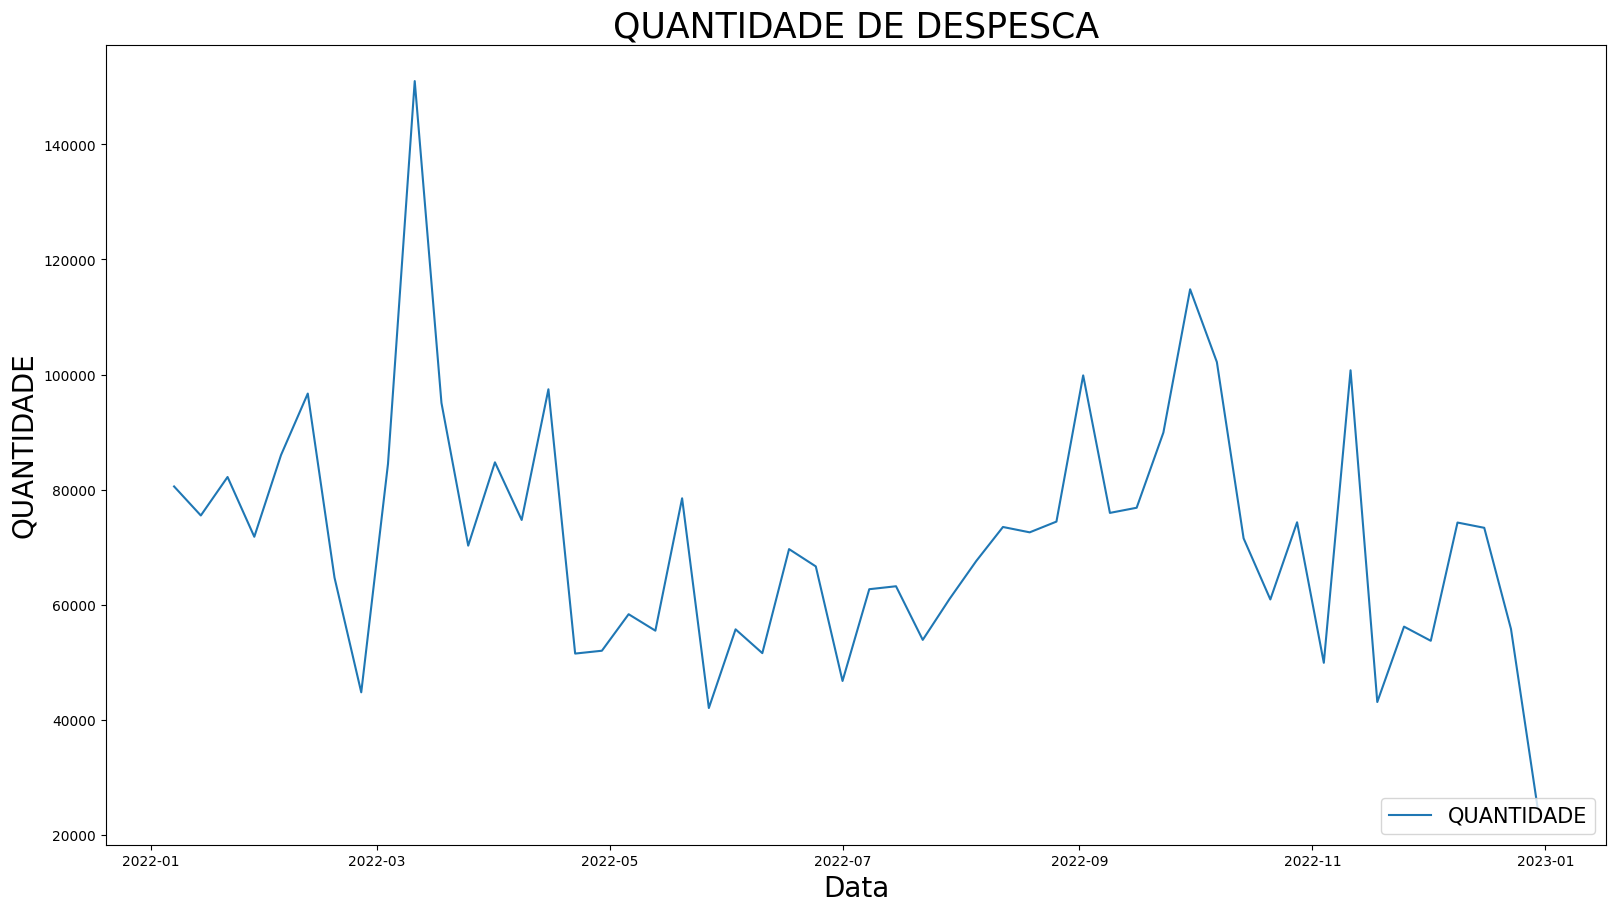

In [12]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(weekly_data['DATA MOVIMENTAÇÃO'], weekly_data['QUANTIDADE'])

eixo.set_title('QUANTIDADE DE DESPESCA', fontsize=25)
eixo.set_ylabel('QUANTIDADE', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['QUANTIDADE'], loc = 'lower right', fontsize=15)

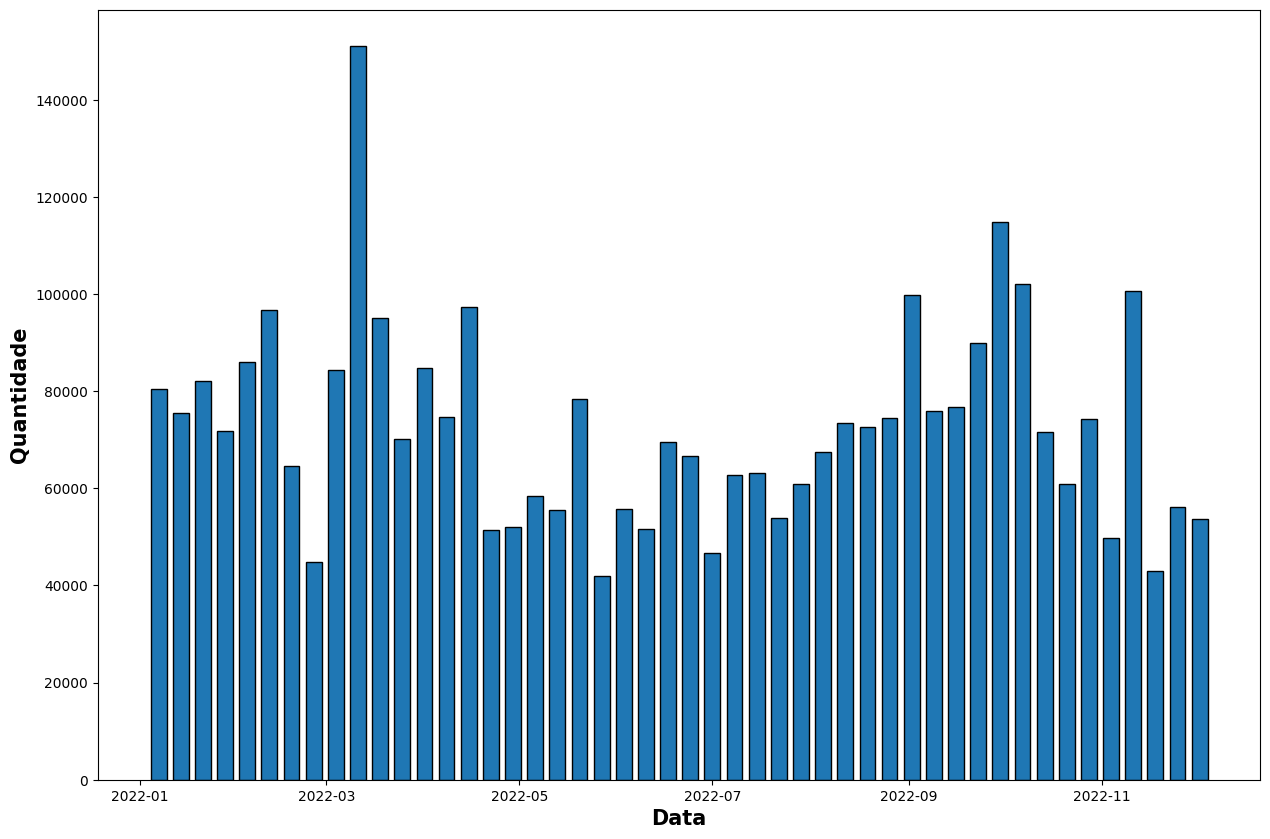

In [13]:
name = weekly_data['DATA MOVIMENTAÇÃO'].head(48)
price = weekly_data['QUANTIDADE'].head(48)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:48], price[0:48], width = 5, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [14]:
weekly_data.head()

,DATA MOVIMENTAÇÃO,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
0,2022-01-07,95718,1936,150,96005,33.736605,1488.16,80541,14960,15679.167955,719.167955,1526.760611,73998.089,78624.800091,82742.026578,84754.0,0
1,2022-01-14,67518,1245,142,88624,24.468202,1016.22,75492,10029,10834.470874,805.470874,1018.189982,68994.831,74418.084688,81044.453961,82275.0,0
2,2022-01-21,86845,1560,109,103561,29.868687,1286.93,82185,13421,13766.907510,345.907510,1364.843312,77992.063,80779.427340,90154.416200,91731.0,0
3,2022-01-28,81715,1421,160,102306,27.318657,1202.73,71793,12486,12878.811862,392.811862,1260.473253,68993.124,71079.515739,84424.548646,85282.0,0
4,2022-02-04,95322,1613,119,118476,30.930600,1377.04,86007,14786,15002.240397,216.240397,1478.188723,84915.479,86012.344000,97601.019468,97705.0,0


In [15]:
monthly_week_data = weekly_data.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()
monthly_week_data.head(12)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,
2022-01-31,331796,6162,561,390496,115.392152,4994.04,310011,50896,53159.358202,2263.358202,5170.267158,289978.107,304901.827858,338365.445386,344042.0,0
2022-02-28,315262,5207,437,371430,104.373504,4533.47,292130,45960,48113.024085,2153.024085,4678.574158,271904.670,286648.630269,317239.108444,323312.0,0
2022-03-31,461763,5478,646,504966,148.555800,6366.58,400788,59922,63417.850215,3495.850215,6240.264991,363975.729,385782.101716,416186.885962,432935.0,0
2022-04-30,465227,4684,613,462730,143.603246,6096.69,360347,56597,58216.716070,1619.716070,6028.062506,327481.297,338369.202238,377805.004864,402597.0,0
2022-05-31,321341,3517,371,292075,99.125138,4027.74,234291,40067,36214.592859,0.592859,3701.936965,227989.050,209614.770447,234509.359872,239590.0,0
2022-06-30,362170,4341,338,319422,99.465805,4391.41,243543,45554,45034.184758,-519.815242,4561.081709,244982.927,242408.574872,267287.605590,268693.0,0
2022-07-31,402254,4897,507,359438,97.424743,4674.73,287421,49159,50641.423645,1482.423645,4661.371969,294676.526,303508.696033,336069.239039,317835.0,0
2022-08-31,421857,5135,514,369126,86.305171,4652.43,288057,50329,52066.729357,1737.729357,4643.029645,302984.155,313958.744992,346210.170791,317984.0,0
2022-09-30,877636,9841,899,577695,161.370545,9222.28,457358,96262,95390.492330,-871.507670,9592.687479,462957.407,459140.053512,514591.177458,512609.0,0


In [16]:
monthly_week_data=monthly_week_data.reset_index()

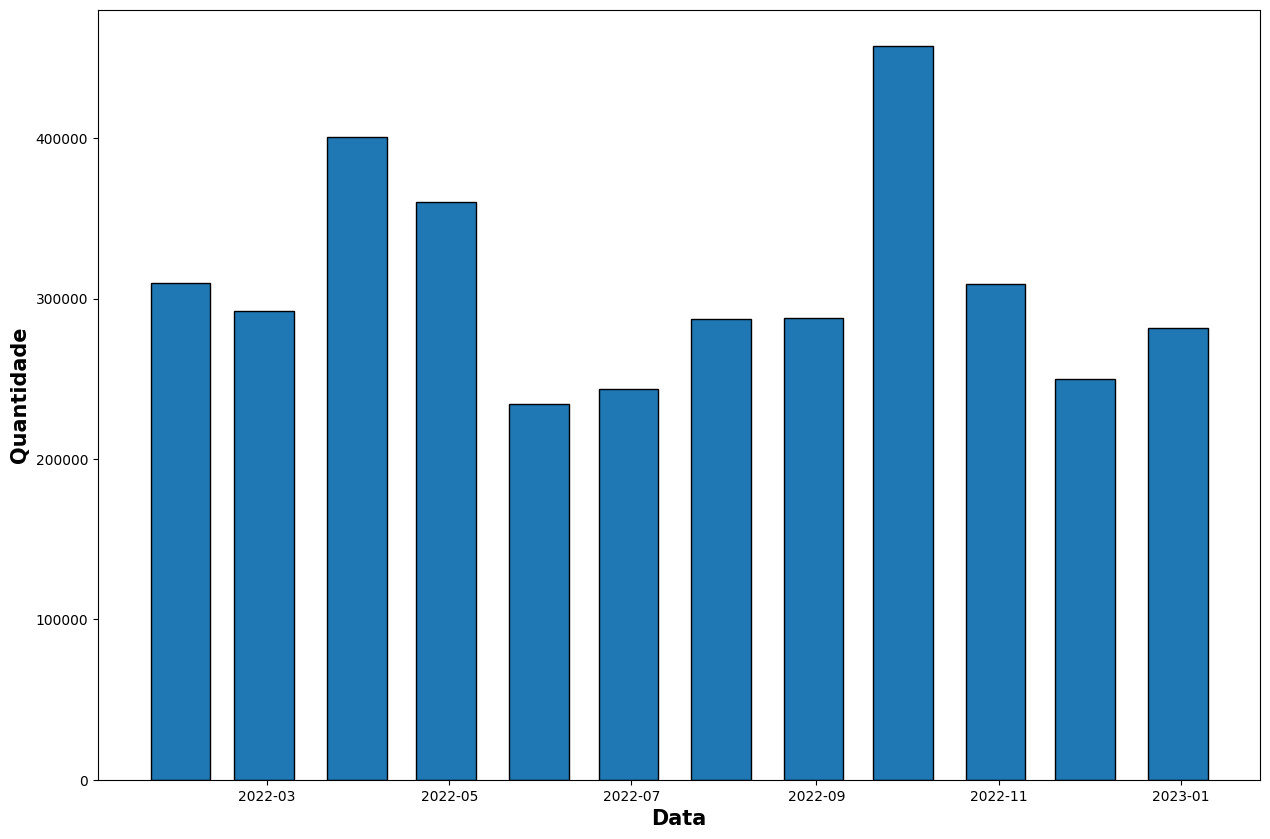

In [17]:
name = monthly_week_data['DATA MOVIMENTAÇÃO'].head(12)
price = monthly_week_data['QUANTIDADE'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))
 
# Horizontal Bar Plot
plt.bar(name[0:12], price[0:12], width = 20, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('Quantidade', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()

In [18]:
monthly_week_data.describe()

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,450396.166667,5357.083333,525.500000,383990.416667,109.283878,5270.292500,309528.750000,53446.166667,54058.991118,1269.907785,5258.344310,302206.505083,306803.879919,337206.294129,335844.000000,0.0
std,152765.953328,1606.757800,151.659007,88657.831698,27.850143,1456.840972,66312.359855,14891.749362,14866.839968,1231.288427,1551.907220,62988.427502,65527.485153,73878.938352,77937.394823,0.0
min,315262.000000,3517.000000,338.000000,281809.000000,71.461771,4027.740000,234291.000000,40067.000000,36214.592859,-871.507670,3701.936965,227989.050000,209614.770447,234509.359872,239590.000000,0.0
25%,354576.500000,4598.250000,429.000000,331110.750000,94.644850,4497.955000,273707.750000,45842.000000,46884.966188,741.363812,4556.596587,267171.270750,278557.579070,301309.800081,290495.500000,0.0
50%,415026.000000,5016.000000,510.500000,364282.000000,100.180615,4663.580000,290093.500000,49744.000000,51354.076501,1523.158488,4669.973063,292327.316500,297128.871687,326654.173742,317909.500000,0.0
75%,469158.500000,5640.500000,580.000000,408554.500000,122.444926,5779.830000,322595.000000,57172.500000,56445.644615,1841.553039,5485.921744,317360.669500,320061.359304,354108.879310,358680.750000,0.0
max,877636.000000,9841.000000,899.000000,577695.000000,161.370545,9222.280000,457358.000000,96262.000000,95390.492330,3495.850215,9592.687479,462957.407000,459140.053512,514591.177458,512609.000000,0.0


## Medias semanais

In [19]:
# Assuming you have a DataFrame 'df' with a column named 'DATA MOVIMENTAÇÃO'
# containing the dates

# Sample DataFrame creation
#data = {'DATA MOVIMENTAÇÃO': pd.date_range(start='2022-01-01', end='2022-04-01', freq='D'),
#        'value': range(1, 92)}
#df = pd.DataFrame(data)

# Convert 'DATA MOVIMENTAÇÃO' to datetime if it's not already
df['DATA MOVIMENTAÇÃO'] = pd.to_datetime(df['DATA MOVIMENTAÇÃO'])

# Divide data by week
weekly_data_median = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).median()

# Divide data by month
#monthly_data = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).sum()

#print("Weekly Data:")
#print(weekly_data)
#print("\nMonthly Data:")
#print(monthly_data)

C:\Users\crist\AppData\Local\Temp\ipykernel_18708\1421686839.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data_median = df.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='W-FRI')).median()


In [20]:
weekly_data_median.head(48)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,
2022-01-07,6027.0,119.0,8.0,4597.0,2.056096,93.835,4386.0,949.5,975.444697,49.643774,95.058570,4144.8500,4376.002299,4350.421861,4402.5,0.0
2022-01-14,6165.0,110.0,13.0,8356.0,2.203036,93.040,7433.0,900.0,983.188659,78.561061,92.002881,7151.9520,7354.884317,7670.004151,7783.0,0.0
2022-01-21,6206.0,112.5,8.0,8170.0,2.137574,92.770,7397.0,955.0,983.301182,28.159768,97.150954,6879.6455,7253.738213,7645.172750,7785.0,0.0
2022-01-28,6235.0,117.0,13.0,8168.0,2.056189,93.670,4950.0,966.0,988.377646,22.271521,97.746417,4836.1500,4914.631168,7705.553051,7779.0,0.0
2022-02-04,6362.0,106.0,7.0,8131.0,2.087849,91.410,7125.0,997.0,1005.054122,11.159324,98.893099,7060.8750,7119.715586,7671.642360,7762.0,0.0
2022-02-11,6427.0,104.5,9.0,8095.5,2.118489,93.150,7090.0,922.0,989.708564,64.112635,93.570192,6482.6760,6916.825643,7562.455474,7798.0,0.0
2022-02-18,6544.5,98.0,5.5,8067.5,2.150204,92.965,5879.5,894.0,950.269385,63.061602,93.488302,5361.2605,5511.864951,7280.274459,7734.5,0.0
2022-02-25,6566.5,104.5,12.0,8134.0,2.050899,97.475,7728.0,888.5,975.240444,86.523399,91.128368,6777.4560,7579.604410,7759.626572,7932.0,0.0
2022-03-04,6782.5,83.5,8.5,8069.0,2.102735,96.630,7676.5,900.0,983.875758,73.626014,92.442651,6852.0720,7555.781446,7744.390378,7870.5,0.0


## Media mensal

In [21]:
weekly_data_median=weekly_data_median.reset_index()

In [22]:
weekly_data_median_month = weekly_data_median.groupby(pd.Grouper(key='DATA MOVIMENTAÇÃO', freq='M')).median()

In [23]:
weekly_data_median_month.head(12)

,ID LOTE,n° DIAS,ORDEM LINHA,QTD INICIAL,CONVERSÃO,SOBREVIVENCIA,QUANTIDADE,PESO,PESO ESPERADO,DIF. PESO,PERCENTUAL PREV X REAL,BIOMASSA,BIOMASSA ESPERADA,BIOMASSA ESPERADA TOTAL,SALDO DIA ANTERIOR,% MORTE DIA ANTERIOR
DATA MOVIMENTAÇÃO,,,,,,,,,,,,,,,,
2022-01-31,6185.50,114.75,10.50,8169.00,2.096881,93.3550,6173.50,952.25,983.244920,38.901771,96.104762,5857.89775,6084.184690,7657.588450,7781.00,0.0
2022-02-28,6485.75,104.50,8.00,8113.25,2.103169,93.0575,7107.50,908.00,982.474504,63.587119,93.529247,6630.06600,7018.270614,7617.048917,7780.00,0.0
2022-03-31,7027.00,83.00,7.75,8065.50,2.249188,97.2350,7637.25,900.00,966.122544,50.005498,94.867772,6695.41925,7312.634348,7606.146380,7888.50,0.0
2022-04-30,7519.50,79.00,9.00,8042.00,2.280226,99.2350,6424.00,916.50,937.719076,29.077960,96.942631,5993.59200,5993.592000,7418.418379,7961.00,0.0
2022-05-31,7824.75,85.75,7.25,8102.00,2.441308,99.3200,5810.75,968.75,971.597446,0.600471,99.936042,5776.09800,5792.846246,7768.827121,8013.25,0.0
2022-06-30,8127.00,91.25,6.50,8106.00,2.201311,99.0725,5678.00,1005.50,978.709825,-14.124481,101.454186,5604.04350,5557.416282,7702.771029,7938.50,0.0
2022-07-31,8337.00,102.00,9.00,8100.00,2.035057,97.6000,7047.50,1027.50,1045.829933,19.053627,98.188911,7320.32200,7454.190780,8118.254808,7814.00,0.0
2022-08-31,8795.00,104.75,13.00,8099.00,1.797433,97.0775,7695.00,1044.00,1106.129981,36.090520,96.770979,8108.88275,8370.392969,8576.460743,7828.00,0.0
2022-09-30,9235.00,105.00,8.00,6098.00,1.679958,97.4100,4241.00,1022.00,1017.204898,-13.829420,101.334658,4309.95350,4342.399682,4260.457160,4028.50,0.0


In [24]:
weekly_data_median_month=weekly_data_median_month.reset_index()

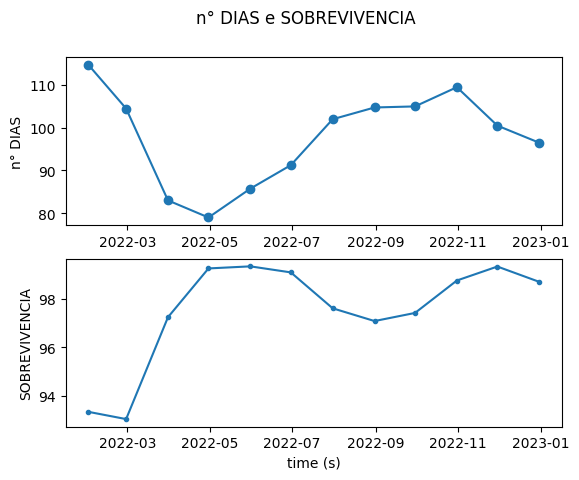

In [27]:
# Create some fake data.
x1 = weekly_data_median_month['DATA MOVIMENTAÇÃO']
y1 = weekly_data_median_month['n° DIAS']
x2 = weekly_data_median_month['DATA MOVIMENTAÇÃO']
y2 = weekly_data_median_month['SOBREVIVENCIA']


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('n° DIAS e SOBREVIVENCIA')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('n° DIAS')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('SOBREVIVENCIA')

plt.show()

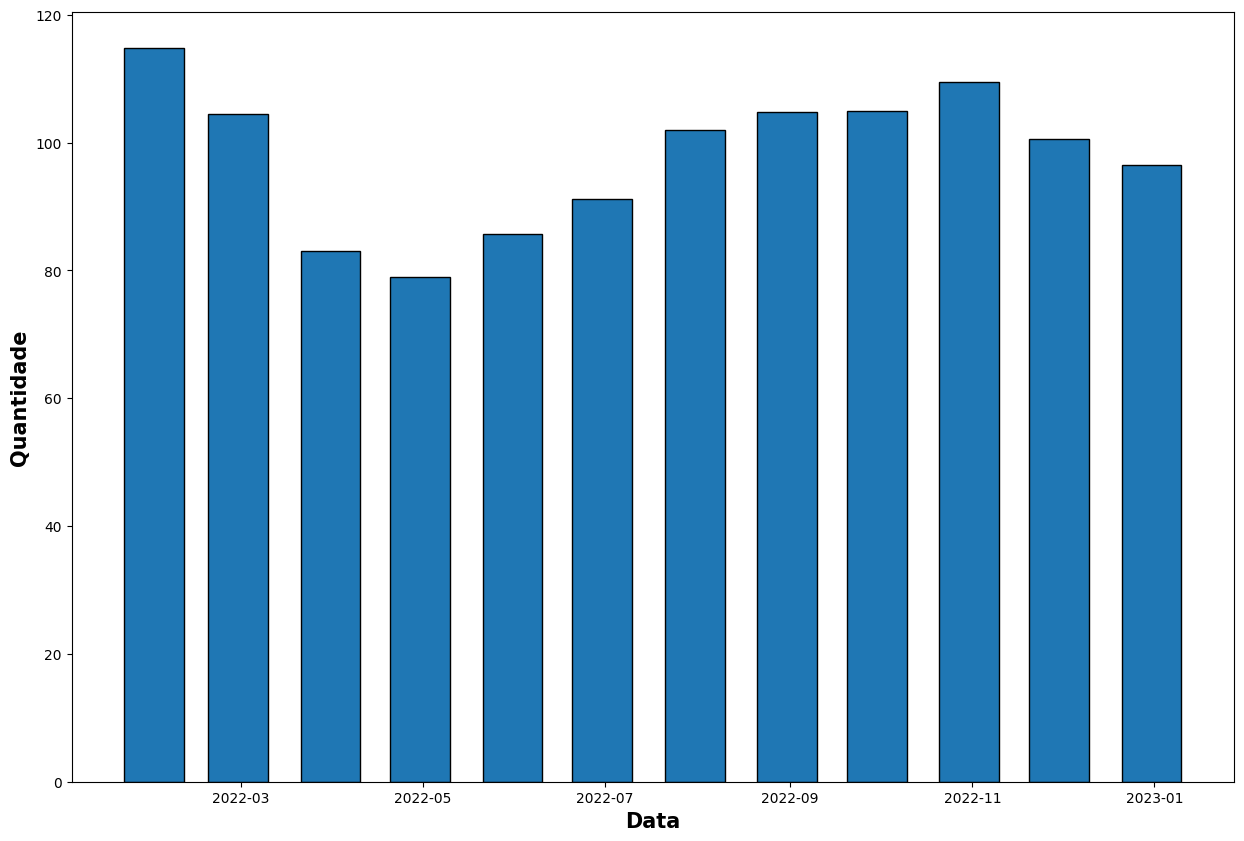

In [26]:
# Cria uma nova Figura e Axes
fig, ax1 = plt.subplots()

name = weekly_data_median_month['DATA MOVIMENTAÇÃO'].head(12)
days = weekly_data_median_month['n° DIAS'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(15, 10))


 
# Horizontal Bar Plot
plt.bar(name[0:12], days[0:12], width = 20, edgecolor ='black')
 
# NAME The AXES
plt.xlabel('Data', fontweight ='bold', fontsize = 15) 
plt.ylabel('Média de dias ', fontweight ='bold', fontsize = 15)  
 
# Show Plot
plt.show()